# CNN: Convolutional Neural Network
## <b>Layers:</b>
- > Convolutional layer
- > ReLU layer
- > Pooling layer: --> Max-pooling | Avg. Pooling # (forms pool matrix)
- > Fully Connected layer

- kernel matrix / filter
- Feature matrix / map

## Steps:

- Convolutional layer
- ReLU layer
- Pooling Layer -> Max Pooling / Avg. Pooling
- Flatten Layer  ( input layer )
- Fully Connected layer

beform all the steps taken into action, the image matrix is given a padding at its borders to prevenet

In [9]:
import pickle
import numpy as np

In [10]:
# unpickling the files
with open(r"C:\Users\jaga7\OneDrive\Desktop\AIMLFiles\PROGRAMS\Face Detection\clean_data\images.p", 'rb') as f:
    images = pickle.load(f)
with open(r"C:\Users\jaga7\OneDrive\Desktop\AIMLFiles\PROGRAMS\Face Detection\clean_data\labels.p",'rb') as f:
    labels = pickle.load(f)

In [11]:
print(images.shape)
print(labels.shape)

(438, 100, 100)
(438,)


In [12]:
set(labels)

{'Rohan Sahani', 'Soumya Ranjan Sahoo', 'bapa', 'jaga', 'nana'}

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [14]:
set(labels)

{0, 1, 2, 3, 4}

In [15]:
a = len(set(labels))
print('Number pf Persons: ',a)

b = le.inverse_transform(np.arange(a))
for i in range(len(b)):
    print(i,'-->',b[i])

Number pf Persons:  5
0 --> Rohan Sahani
1 --> Soumya Ranjan Sahoo
2 --> bapa
3 --> jaga
4 --> nana


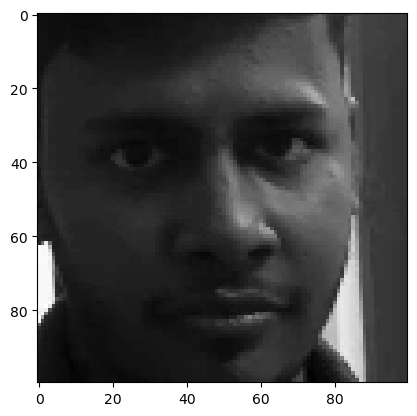

In [17]:
import matplotlib.pyplot as plt
plt.imshow(images[390], cmap = 'gray')
plt.show()

In [18]:
import cv2
def preprocessing(img):
    img = cv2.equalizeHist(img)
    img = img.reshape(100,100,1)
    img = img/255
    return img

In [19]:
image = np.array(list(map(preprocessing, images)))
print('Shape of Input: ', images.shape)

Shape of Input:  (438, 100, 100)


In [20]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [23]:
def lenet_model():
    model = Sequential()
    #Convolution layer to ReLU layer
    model.add(Conv2D(30,(5,5), input_shape = (100,100,1),activation = 'relu'))
    #pooling layer
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(15,(3,3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size =(2,2)))
    #flatten layer
    model.add(Flatten())
    #Hidden layer
    model.add(Dense(200,activation = 'relu'))
    #model.add(Dense(100,activation = 'softmax'))
    #output layer
    model.add(Dense(5,activation = 'softmax'))
    model.compile(Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [24]:
model = lenet_model()
model.summary()

C:\ANACONDA3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 96, 96, 30)          │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 48, 48, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7935)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │       1,587,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,005 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,593,050 (6.08 MB)

 Trainable params: 1,593,050 (6.08 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(images, labels, validation_split = 0.1, epochs = 9)

Epoch 1/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.3507 - loss: 53.7075 - val_accuracy: 0.9318 - val_loss: 0.7046
Epoch 2/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.8997 - loss: 0.4477 - val_accuracy: 0.9545 - val_loss: 0.3256
Epoch 3/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9959 - loss: 0.0112 - val_accuracy: 0.9091 - val_loss: 0.2427
Epoch 4/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.8864 - val_loss: 0.5195
Epoch 5/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 1.0000 - loss: 2.3414e-04 - val_accuracy: 0.8864 - val_loss: 0.5771
Epoch 6/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 1.0000 - loss: 3.3641e-05 - val_accuracy: 0.8864 - val_loss: 0.4553
Epoch 7/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 1.0000 - loss: 6.9612e-06 - val_accuracy: 0.9318 - val_loss: 0.4141
Epoch 8/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 1.0000 - loss: 3.5790e-06 - val_accuracy: 

In [26]:
model.save('final_Face.h5')